In [1]:
#importo librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/matias/Documentos/HousePriceKagleCompetition/Datos originales/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#voy a sumar la cantidad de valores null por cada feature
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

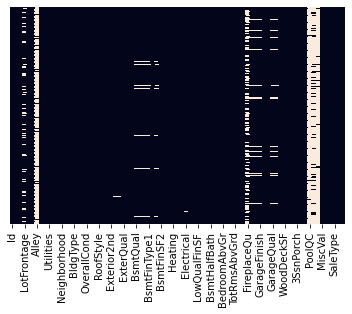

In [5]:
#con el mapa de calor heatmap vemos en blanco la proporcion de valores perdidos (null) de las columnas, caso particular del feature PoolQC
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [6]:
#saco el num de filas y columnas de mi dataset
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#Ahora empiezo a editar algunas features o sacarlas para dejar mi dataset mas limpio, este es un proceso manual donde uno va analizando feature por feature.
#En primera instacia vere aquellos valors nulos y si estos superan la mitad del total de datos en un feature procedere a eliminarlo.
#En otros casos llenare estos valores con la media de su feature si se trata de un valor numerico (real) y con la moda si el feature es de tipo categorico.

#Para empezar tenemos al feature LotFrontage el cual es un valor real y posee menos del 20% de sus valores en nulos, aqui aplico la media y la reemplazo como valor en sus 227 celdas nulas.

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean()) 

In [10]:
#Elimino Alley

df.drop(['Alley'], axis = 1, inplace = True)

In [28]:
#Relleno valores nulos con la moda en las features MasVnrType, BsmtCond, BsmtQual, etc.
#Relleno valores nulos con la media en las features MasVnrArea
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean()) 

df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean()) 

df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])

df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])




In [29]:
#Siguiendo con las features toca eliminar aquellas cuyo valores nulos superan la mitad de la data

df.drop(['PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)

In [33]:
#Eliminamos la feature de ID ya que no nos sirve

df.drop(['Id'], axis = 1, inplace = True)

In [34]:
#Vemos como quedó el dataset

df.shape

(1460, 76)

In [35]:
#Compruebo si me quedaron features con valos null

df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

<AxesSubplot:>

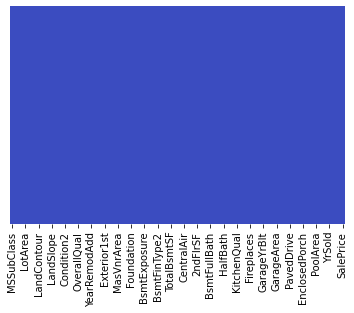

In [36]:
#compruebo con el heat map los valores null

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = 'coolwarm')

In [37]:
df.shape

(1460, 76)